<a href="https://colab.research.google.com/github/MicahMeadows/CSC-781-GoogleColab/blob/main/Gradient_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Here we import the packages that we are going to need for this assignment
- we are using numpy as it gives up array helpers that are very performant.
- we are using pyplot in order to vizualize our plots
- we are using the sklearn data set for the diabetes dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sk

#### Here we will import the data and fix it so our needs
We will be using the diabetes data set which has several features and then labels the blood sugar level for a person.
Based on running tests I have chosen to use the Body Mass Index or BMI feature in order to run these results as it has better correlation than most of the other features.

In [2]:
# diabetes data
data = sk.load_diabetes()

samples = data.data[:, 2]
labels = data.target

fixed_samples = np.array((samples, labels)).T
np.random.shuffle(fixed_samples)

np.random.shuffle(fixed_samples)

num_samples_total = len(fixed_samples)

def split_fixed_samples(fixed_samples):
  feature_objects = fixed_samples[: , 0:1].flatten()
  label_objects = fixed_samples[: , -1]
  return feature_objects, label_objects

top_train_idx = int(num_samples_total * .70)
top_dev_idx = int(num_samples_total * .85)

train_bmis, train_bpls = split_fixed_samples(fixed_samples[:top_train_idx])
dev_bmis, dev_bpls = split_fixed_samples(fixed_samples[top_train_idx:top_dev_idx])
test_bmis, test_bpls = split_fixed_samples(fixed_samples[top_dev_idx:])

#### Visualize data
Here we visualize the data on a scatter plot
- green is the training data which represents 85% of our data
- red is the development data for running dynamic changes to our model
- blue is the testing data for after our results

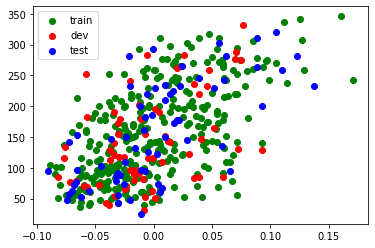

In [3]:
plt.scatter(train_bmis, train_bpls, color='g')
plt.scatter(dev_bmis, dev_bpls, color='r')
plt.scatter(test_bmis, test_bpls, color='b')
plt.legend(('train', 'dev', 'test'))

#### Build our model methods
In this section we define the core of our univariant linear regression model. This is composed of the three main parts.
- Univariant Linear Regression method: This method computes the linear regression.
- Cost Computation: We can score our model using this method to determine if we need to go further.
- Updating the theta: updating the theta is important as it allows us to score better linear regression lines based on the cost function.

In [4]:
# linear regression model
def univariant_linear_regression(theta, input):
  pred = theta[0] + (theta[1] * input)
  return pred

# cost function
def compute_cost(y_pred, y_true):
  m = len(y_true)
  J = 1/(2*m) * (np.sum(y_pred - y_true) ** 2) # MSE
  # J = (1/2m) * (np.abs(y_pred - y_true)) # MAE
  return J

def update_theta(theta, x, y_true, y_pred, learning_rate):
  m = len(y_true)
  theta[0] = theta[0] - (learning_rate * (1/m) * np.sum(y_pred - y_true))
  theta[1] = theta[1] - (learning_rate * (1/m) * np.sum((y_pred - y_true) * x))
  return theta

#### Train the data
In this section we train our theta value by running 5000 linear regressions in order to find the most optimal data for our set.
We are using a .005 learning rate as I found this to be giving us a very low cost by the end of the training data.

cost: 0.00045880516899343715
theta: [153.2518754051021, 52.14739703124688]


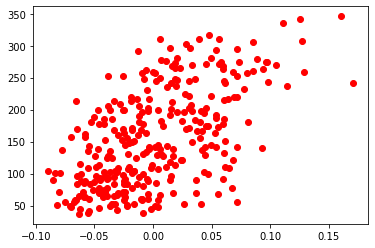

In [11]:
theta = [0.0, 0.0]
lr = .005

k = 0
for i in range(5000):
  pred = univariant_linear_regression(theta, train_bmis)
  cost = compute_cost(pred, train_bpls)
  theta = update_theta(theta, train_bmis, train_bpls, pred, lr)

plt.scatter(train_bmis, train_bpls, color='r')
print(f'cost: {cost}')
print(f'theta: {theta}')

#### Running tests on our trained data
After we have our trained data we can run tests in order to determine predictions for new data.

Unfortunately it seems that by using the BMI we do not get very accurate prediction results when changing into a new data set. The cost during the training data set was only .0004 however swapping it to the testing data set we scored 288 which is very poor for this result. In the future we can make an algorithm that combines multiple features into a more accurate feature in order to get a better result.

In [13]:
test_pred = univariant_linear_regression(theta, test_bmis)
print(test_pred)

test_cost = compute_cost(test_pred, test_bpls)
print(f'testing cost: {test_cost}')

[152.98445614 153.99614784 152.02896954 152.87204596 155.96332613
 158.99840122 151.63553389 152.81584086 158.09911971 152.70343067
 154.3895835  154.10855803 153.4340969  156.46917198 152.92825105
 152.64722558 150.34281672 156.3005567  151.97276445 152.70343067
 153.20927652 149.83697087 148.54425371 151.57932879 152.4224052
 154.72681406 153.54650709 156.41296689 151.35450841 153.15307143
 154.50199369 149.83697087 151.63553389 149.78076578 158.71737575
 150.90486766 153.77132746 153.3778918  156.18814651 149.44353521
 152.14137973 153.77132746 159.67286235 152.19758483 156.63778726
 151.63553389 157.87429934 151.74794407 154.44578859 149.66835559
 151.69173898 149.6121505  153.77132746 157.87429934 152.87204596
 154.16476312 152.19758483 149.44353521 151.91655936 151.57932879
 150.00558616 153.32168671 155.288865   153.60271218 160.40352857
 154.27717331 149.38733012]
testing cost: 288.02995363391045
